# DSM_0501
## 主題: 機器學習(1) - 使用MNIST數據集實作二元圖像分類器
### 專案目標: 
- 了解機器學習系統的種類
- 利用MNIST數據集實作SGDClassifier進行二元圖像分類



Host: Isaac

Time: 2025/05/01
參考書目: 精通機器學習｜使用 Scikit-Learn , Keras 與 TensorFlow, 2/e
- [機器學習演算法－監督與非監督式學習](https://medium.com/marketingdatascience/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E6%BC%94%E7%AE%97%E6%B3%95-%E7%9B%A3%E7%9D%A3%E8%88%87%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92-e9dbeee94a30)
- [Supervised Learning vs. Unsupervised Learning: Choosing the Right Approach](https://www.dataexpertise.in/5-differences-supervised-unsupervised-learning/)
- [關聯法則(Association Rule)（一）詳細介紹與實例](https://adam-study-note.medium.com/%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98%E7%AD%86%E8%A8%98-%E9%97%9C%E8%81%AF%E6%B3%95%E5%89%87-association-rule-%E4%B8%80-%E8%A9%B3%E7%B4%B0%E4%BB%8B%E7%B4%B9%E8%88%87%E5%AF%A6%E4%BE%8B-f3e6fc43773f)
- [梯度下降（Gradient Descent）小结 ](https://www.cnblogs.com/pinard/p/5970503.html)

關鍵字: 
`Sklearn` `MNIST` `梯度下降` `監督式學習`

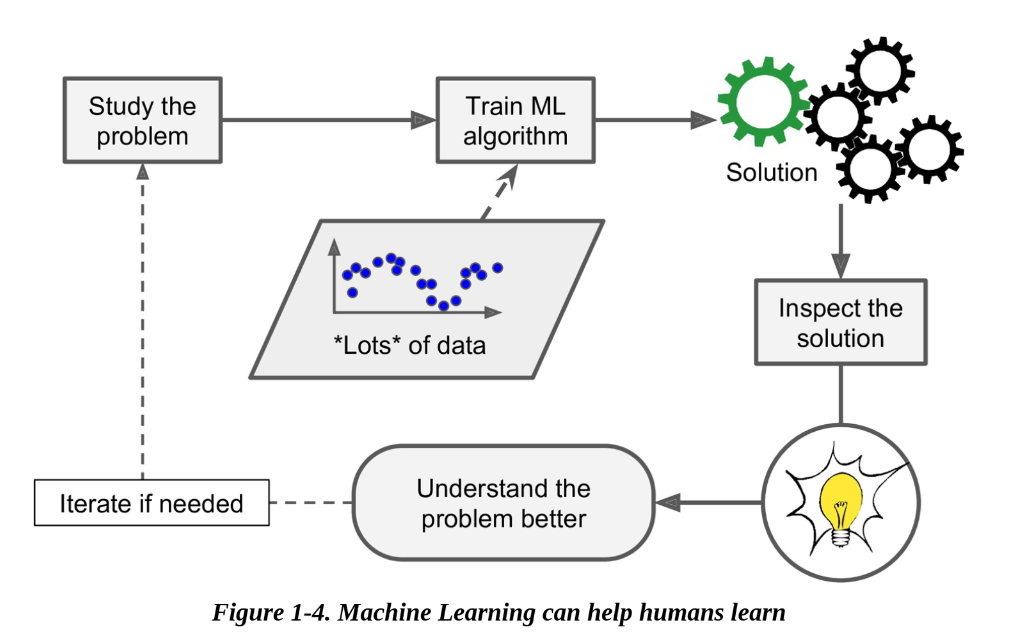

## 機器學習專案流程
1. **取得資料並視覺化**，觀察數據的屬性和相關性
2. **資料清理**，處理欄位屬性、缺失值、異常值等問題，甚至自定義轉換資料的函數
3. **特徵工程**，選擇適合的特徵，並進行縮放、標準化等處理
4. **選擇與訓練模型** (這幾周最主)
5. **微調模型**，調整超參數
6. **評估模型**，使用測試集評估模型的準確性
7. **部署模型**，將模型應用於實際場景中
8. **監控模型**，持續監控模型的性能，並進行必要的調整和更新

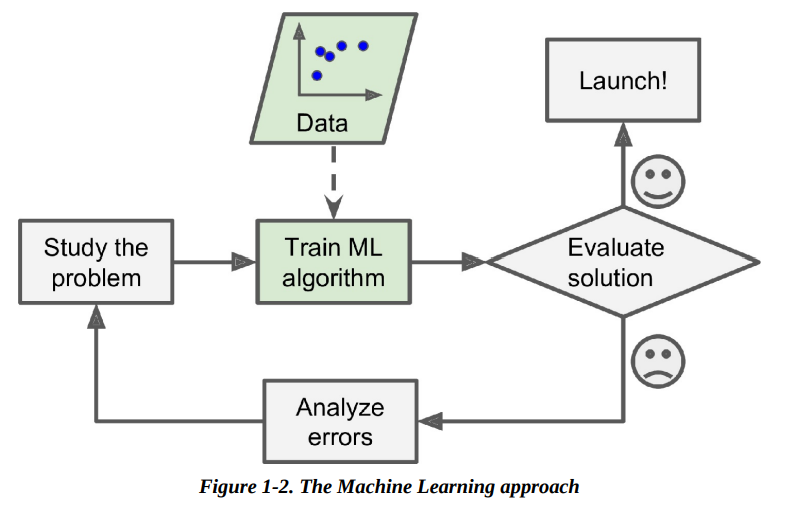

## 機器學習系統的種類
機器學習系統可以根據各種標準來分成廣泛的類別
- `是否需要人類監督來訓練`(監督、非監督、半監督、強化學習)
- `是否可在運行時進行學習`(線上學習、批量學習)
- `拿新資料點與已知資料點進行比較的方式`(基於實例(instance-based)的學習、基於模型(model-based)的學習)

###  一、是否需要人類監督來訓練？

| 分類              | 是否需要標籤 | 核心特徵說明 |
|-------------------|--------------|----------------|
| **監督式學習** (Supervised Learning) |  是          | 使用「輸入+對應正確輸出（label）」資料訓練模型，學習一個映射關係 f(x)=y。適用於分類與回歸任務。 |
| **非監督式學習** (Unsupervised Learning) |  否         | 沒有標籤，只靠輸入資料本身找出結構，例如分群、降維、關聯規則。 |
| **半監督學習** (Semi-supervised Learning) | ⚠️ 部分       | 大多數資料沒有標籤，少部分有標籤。適合大量資料但標註成本高的情境。會用有標籤資料引導模型學習未標資料的潛在結構。 |
| **強化學習** (Reinforcement Learning) | 否（但需回饋） | 無需標籤，但模型會透過與環境互動獲得**回饋（reward/signal）**、`獎勵機制`，學習最佳行為策略（如玩遊戲、走迷宮）。 |

#### 舉例：
- 監督：分類信用卡是否詐騙（有標籤）
- 非監督：把顧客分群做行銷（無標籤）
- 半監督：有一小部分文件標記過分類，其餘沒標
- 強化：AlphaGo 下棋獲勝得分數作為學習依據



### 是否可在運行時進行學習？

| 類型               | 是否即時更新 | 說明 |
|--------------------|----------------|-------|
| **線上學習** (Online Learning) |  是            | 模型可隨資料流即時更新，不需從頭訓練。適合資料不斷到來（如股價、IoT、聊天紀錄）的情況。記憶體與延遲要求低。 |
| **批量學習** (Batch Learning / Offline Learning) |  否（需重訓）  | 一次收集所有資料後訓練模型，模型固定。若資料更新需整體重訓。不適用於資料流或大規模動態資料情境。 |

#### 舉例：
- 線上學習：推薦系統根據你剛看的影片馬上更新推薦列表
- 批量學習：用10年財報資料訓練模型做公司信用預測



### 與新資料點的比較方式（學習方式分類）

| 類型                   | 說明 | 特徵 |
|------------------------|------|------|
| **基於實例的學習** (Instance-based Learning) | 不建立顯式模型，而是直接保留訓練資料，在預測時與新資料比較距離。類似「記憶型學習」。 | 計算量大，對記憶要求高，預測速度慢但訓練快。 |
| **基於模型的學習** (Model-based Learning) | 將訓練資料用統計或函數方法**擬合成模型參數**，使用這個模型進行預測。屬於「抽象理解」方式。 | 訓練時間較久，但預測快，適合大規模部署。 |

#### 舉例：
- Instance-based：KNN、最近鄰推薦系統（看過哪些影片 → 推你類似的）
- Model-based：邏輯迴歸、決策樹、SVM、神經網路（先學會一個「規則模型」）


這些標準並不是互斥的，許多系統可以同時屬於多個類別，你也可以用適合的方式來組合這些系統，讓它們能夠互相合作。

今天我們主要會根據**是否需要人類監督來訓練**這個標準來分類機器學習系統。

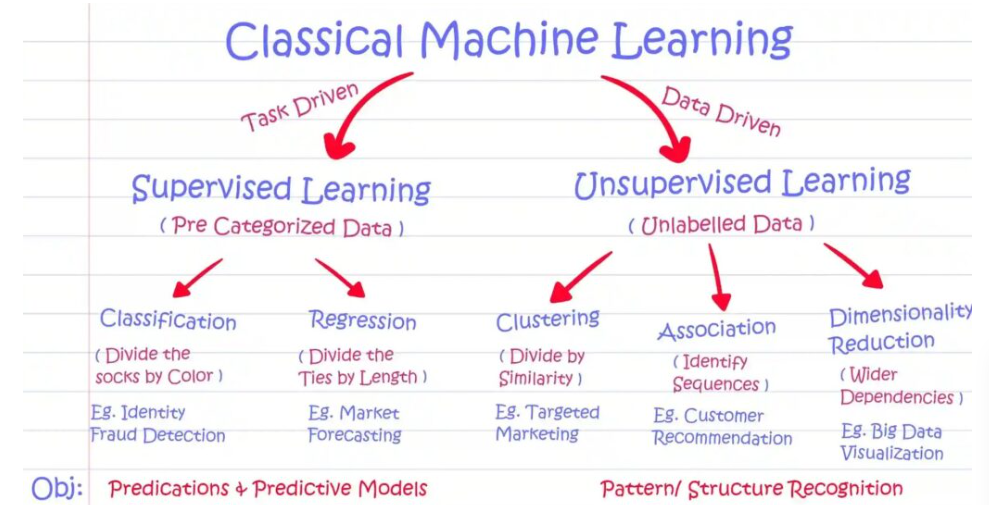

懶得看英文? 下面也是差不多的概念

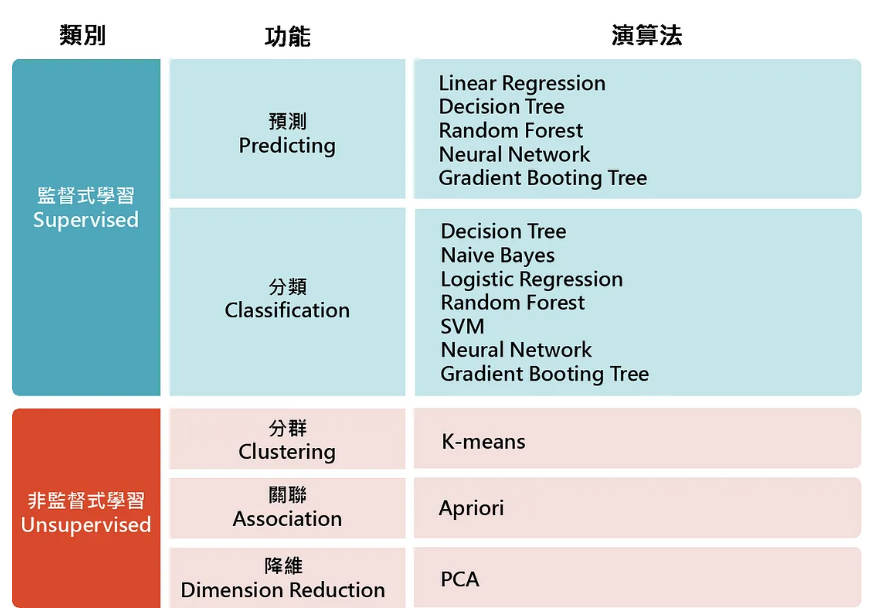

## 監督式學習與非監督式學習
- 監督式學習: 有標籤的資料集，模型學習如何從輸入預測輸出
- 非監督式學習: 無標籤的資料集，模型學習如何從輸入中找出結構或模式
- 半監督式學習: 部分標籤的資料集，結合監督式與非監督式學習的優點
- 強化學習: 透過獎勵與懲罰來學習最佳行動策略，通常用於遊戲或控制問題


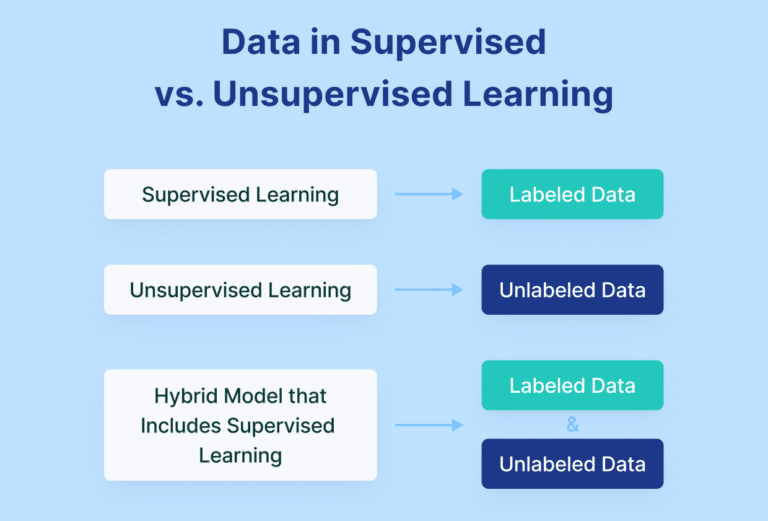

## 常見的監督式學習演算法
在監督式學習裡，通常要達到`預測（Predicting）`與`分類（Classification`的目的。
- `預測`是指對連續數值的預測，例如房價、氣溫等。
- `分類`是指對離散類別的預測，例如將電子郵件分類為垃圾郵件或非垃圾郵件。


## Regression（迴歸）

> **目標：** 預測一個連續數值，根據輸入變數找出對應的實數輸出。  
> **應用：** 房價預測、銷售量估計、氣溫預測、壽命預測等。

### 主要演算法：
- **Linear Regression（線性迴歸）**  
  假設輸入變數與輸出之間存在線性關係，使用最小平方法來擬合直線模型，易於實作與解釋。
  
- **Polynomial Regression（多項式迴歸）**  
  將變數升冪後套入線性迴歸模型，能擬合曲線型資料，適合處理資料非線性但具有平滑趨勢的情況。

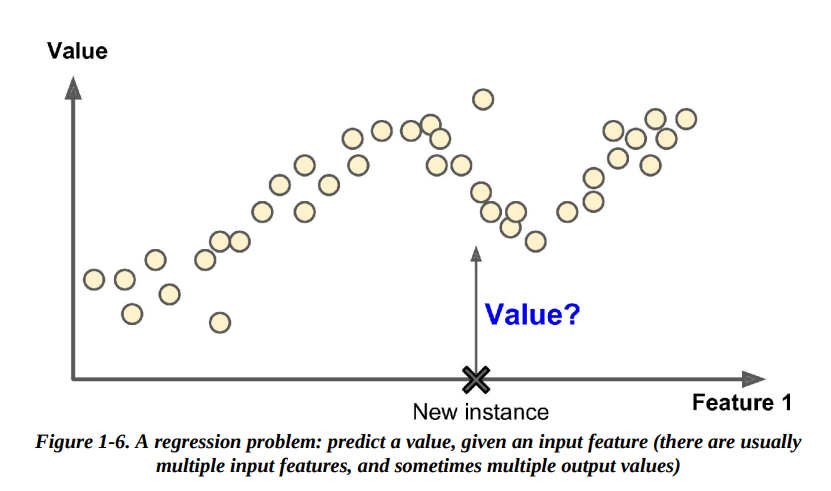

## Classification（分類）

> **目標：** 根據輸入特徵，預測資料屬於哪一類別（離散標籤）。  
> **應用：** 疾病診斷、垃圾郵件偵測、客戶流失預測、圖像辨識等。

### 主要演算法：
- **Logistic Regression（邏輯迴歸）**  
  雖然名稱有回歸，但本質是分類演算法，輸出的是資料屬於某類的機率，適合二元分類。
  
- **Decision Trees（決策樹）**  
  透過一系列二元決策（例如「年齡 > 30？」）建立樹狀結構，分類結果對人類可解釋，易視覺化。
  
- **Random Forest（隨機森林）**  
  集成多顆決策樹的結果來進行分類（投票法），提高模型穩定度與準確性，抗過擬合能力強。
  
- **Support Vector Machines (SVM)**  
  嘗試尋找一個最佳分類邊界（超平面）來區分類別，特別適合高維與資料稀疏的情況，能透過 kernel 擴展至非線性分類。
  
- **K-Nearest Neighbors (KNN)**  
  預測時根據新資料點周圍 k 個最近鄰的類別來決定分類，屬於基於實例的學習，不建模但預測成本高。
  
- **Naive Bayes（單純貝氏）**  
  基於貝氏定理，假設特徵彼此獨立，儘管假設簡單，但對高維資料（如文字分類）表現良好。


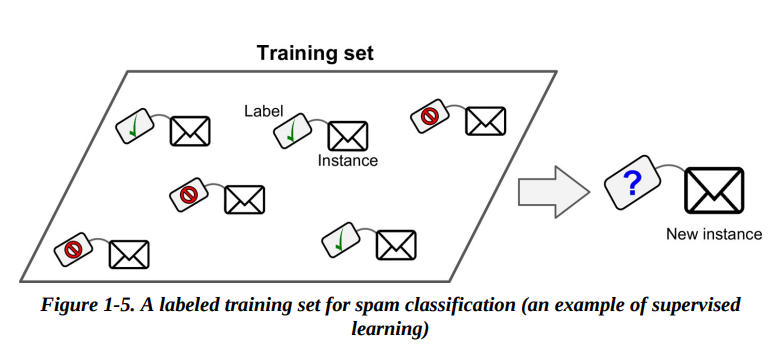

## 常見的非監督式學習演算法
如果無法事先`定義每筆資料「屬於哪一類」或「應該是什麼答案」`，或是想`了解資料內部的結構、相似性、群聚關係`，而不是直接預測結果，這時候就可以使用非監督式學習。


## **Clustering（群聚分析）**  
> **目標：** 將資料根據相似程度分成不同群組，群內相似、群間差異大。  
> **應用：** 客戶分群、影像壓縮、主題歸類、社群分析等。

### 主要演算法：
- **K-Means Clustering（K均值群聚）**  
  使用 k 個「群心」將資料分為 k 群，透過反覆計算與更新群心來收斂。適合資料形狀清楚、分布均勻的情況。
  
- **DBSCAN Clustering（密度式群聚）**  
  根據資料點的密度判定是否為同一群，能處理**任意形狀**的群組並自動濾除離群點。
  
- **Hierarchical Clustering（階層式群聚）**  
  建構樹狀的群聚結構，逐步合併或拆分群組，可視為「群組的群組」，適合視覺化。
  
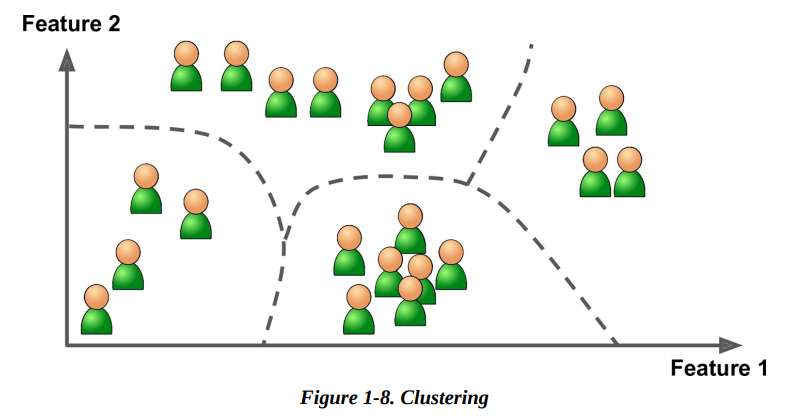

## **Association Rule Learning（關聯規則學習）**  
> **目標：** 從大量資料中找出「某項出現時，另一項也可能出現」的關係（關聯規則）。  
> **應用：** 購物籃分析、商品推薦、網站行為分析等。
> 

### 主要演算法：
- **Apriori Algorithm（Apriori演算法）**  
  根據支持度（Support）與信賴度（Confidence）來建立規則，透過「頻繁項集」剪枝方式降低運算量。
  
- **Eclat Algorithm（Eclat演算法）**  
  以垂直資料結構進行關聯分析，使用交集運算比 Apriori 更快，適合稠密資料。
  
- **FP-Growth Algorithm（FP-Growth演算法）**  
  建立一棵頻繁模式樹（FP-tree），不需產生候選項集，**比 Apriori 效率更高**。

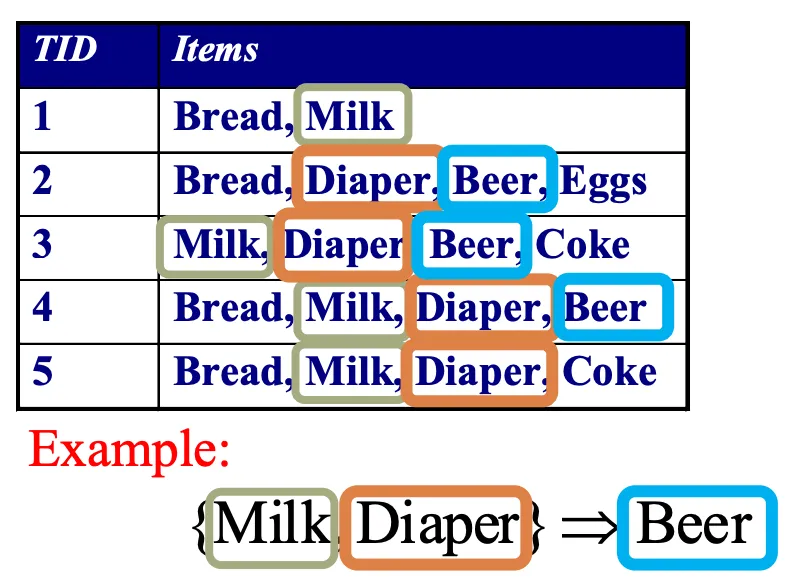


## **Dimensionality Reduction（降維）**  
> **目標：** 將高維資料映射至較低維空間，保留最重要資訊，同時提升運算效率與視覺化可讀性。  
> **應用：** 特徵選取、視覺化、除雜訊、模型壓縮等。

### 主要演算法：
- **Principal Component Analysis (PCA)**  
  透過線性投影，找出最大變異方向作為主成分。適合資料線性結構明確的情境。
  
- **Kernel PCA（核主成分分析）**  
  加入核技巧處理非線性資料，使 PCA 可映射到高維特徵空間。
  
- **t-SNE（t-Distributed Stochastic Neighbor Embedding）**  
  非線性降維方法，保留點與點之間的相對距離，**特別適合做資料視覺化**（如顯示分類邊界）。
  
- **LLE（Locally Linear Embedding）**  
  強調保留資料「局部線性關係」的降維方法，適合非線性流形資料。

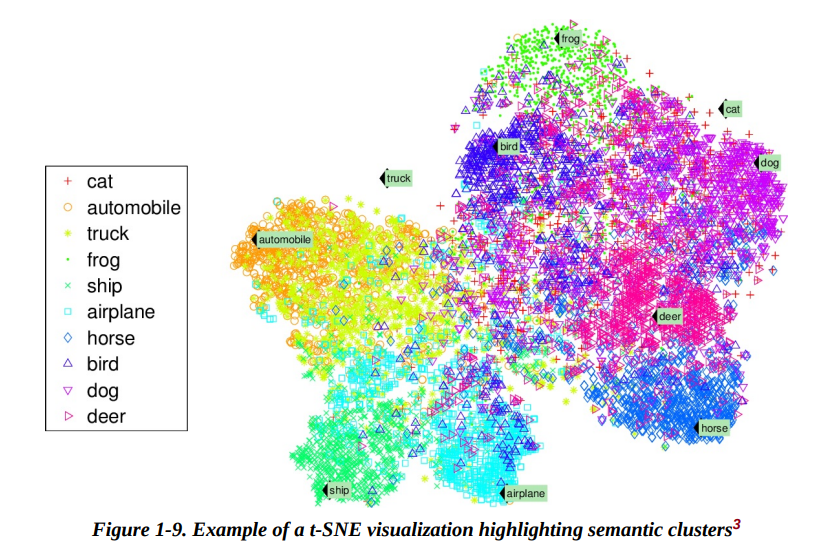

## 分類實作: MNIST 手寫數字集
這個數據集有70000張手寫數字的圖片，這些圖片是28x28像素的灰階圖像。每張圖片都與一個標籤相關聯，該標籤表示圖像中顯示的數字（0到9）。

這應該是機器學習跟深度學習最經典的數據集之一，因為它非常簡單易用，並且可以用來測試各種機器學習和深度學習算法。



### 載入數據集
我們使用scikit-Learn中的`fetch_openml`函數來下載MNIST數據集。這個函數會自動從OpenML網站下載數據集並將其加載到Python中。然後，我們將數據集分為訓練集和測試集，並將它們轉換為NumPy數組，以便進行後續的機器學習操作。


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#展示數據集的鍵
mnist.keys()

c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])



- `'data'`：儲存所有圖片的像素值（已展平成 784 維的向量）
- `'target'`：對應的數字標籤（0~9）
- `'DESCR'`：資料描述文字
- `'feature_names'`：特徵欄位名稱（像素點名稱）
- `'frame'`：可選的 pandas DataFrame 格式



In [ ]:
!pip install scikit-learn

In [11]:
x, y = mnist['data'], mnist['target']
x.shape, y.shape


((70000, 784), (70000,))

- `x` 是影像資料，70,000 筆資料，每筆有 784 個特徵（28x28 像素展平後），可以想像每個像素都有一個亮度值（例如從 0 到 255），變成一個 28 × 28 的「圖片格子表」
- `y` 是標籤資料，也有 70,000 筆，代表每張圖對應的數字（0~9）

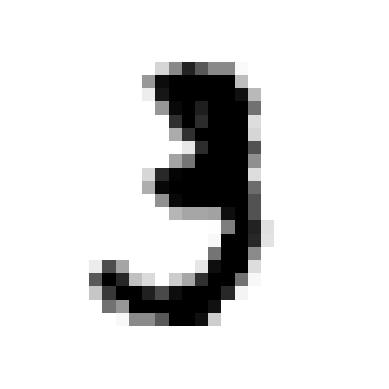

3

In [ ]:
import numpy as np

# 轉為 numpy 陣列
x = x.to_numpy()

# 取出第一筆圖像
some_digit = x[10]
some_digit_image = some_digit.reshape(28, 28)

# 顯示圖像
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

#查看數字的標籤
y[10]  

隨機抽出100張圖片

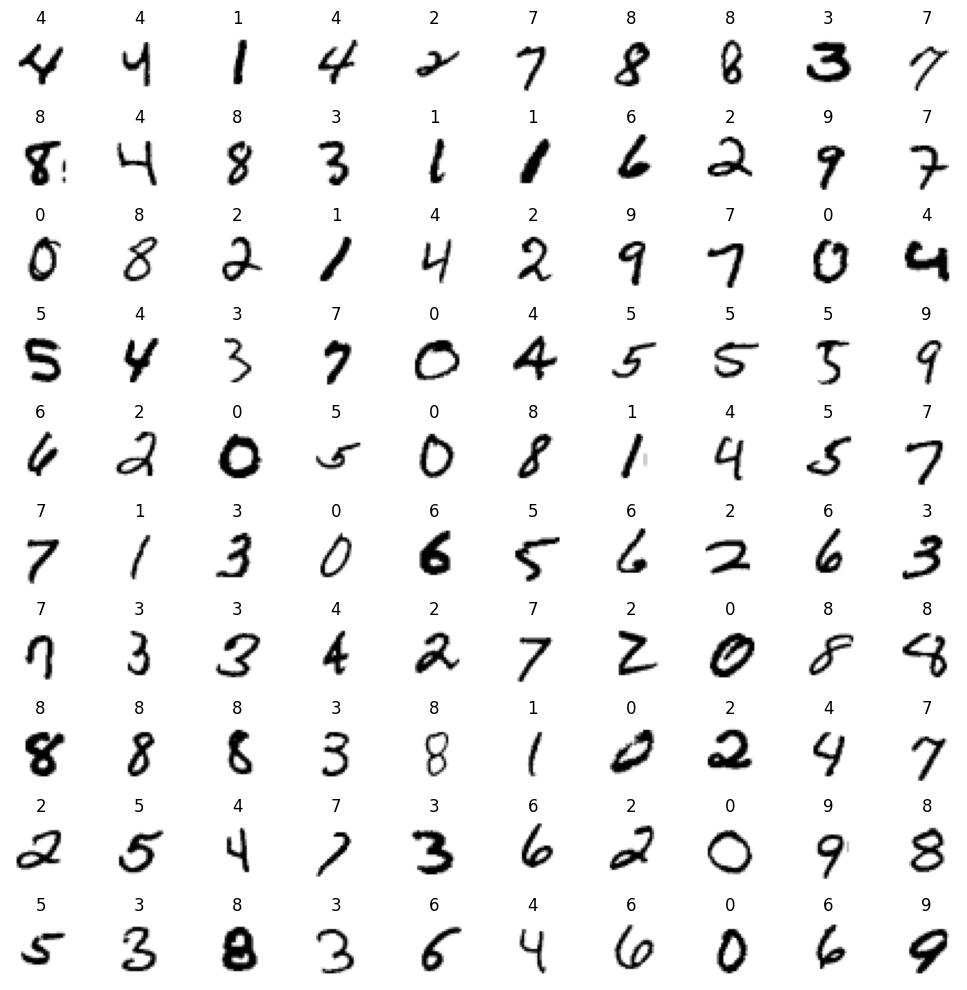

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 隨機抽出100筆資料
random.seed(42)
random_indices = random.sample(range(0, 70000), 100)
random_indices.sort()

# 取出100筆資料
random_digits = x[random_indices]
random_labels = y[random_indices].to_numpy() 

# 顯示100筆資料
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(random_digits[i * 10 + j].reshape(28, 28), cmap="binary")
        ax.axis("off")
        ax.set_title(random_labels[i * 10 + j])
plt.tight_layout()
plt.show()


由於y標籤是字串，所以我們需要將它轉換為整數類型。這可以通過使用`astype(int)`方法來實現。這樣做的原因是，許多機器學習算法需要數字類型的標籤來進行計算和訓練。

In [17]:
y = y.astype(int)
y[10]

3

接著，我們將數據集分為訓練集和測試集

In [ ]:
x_train, x_test = x[:56000], x[56000:]
y_train, y_test = y[:56000], y[56000:]


#檢查資料集
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### 訓練二元分類器
我們先簡化一個問題，只要辨識數字 5 與非 5 的分類問題就好。

這樣我們就可以將 y 標籤轉換為二元分類的形式，將所有標籤為 5 的資料標記為 1，其他標籤標記為 0。這樣做的原因是，我們的模型只需要學習如何區分數字 5 與其他數字，而不需要考慮所有的數字類別。

In [ ]:
y_train_3 = (y_train == 3) #將標籤為5的數字標記為True，其他標記為False
y_test_3 = (y_test == 3)

今天我們要使用的第一個分類模型是`隨機梯度下降法（Stochastic Gradient Descent, SGD）`，這是一種基於梯度下降的優化算法，適用於大規模資料集。

### 隨機梯度下降法（SGD）
隨機梯度下降法是一種迭代優化算法，用於最小化損失函數。它的基本思想是隨機選擇一個樣本來計算梯度，然後更新模型參數。這樣做的好處是可以加快收斂速度，特別是在處理大規模資料集時。

梯度下降法步驟：

1. 算出損失函數對模型參數的偏微分（也就是梯度）

2. 沿著梯度的反方向調整參數

3. 直到損失函數收斂到最小值（或夠小）

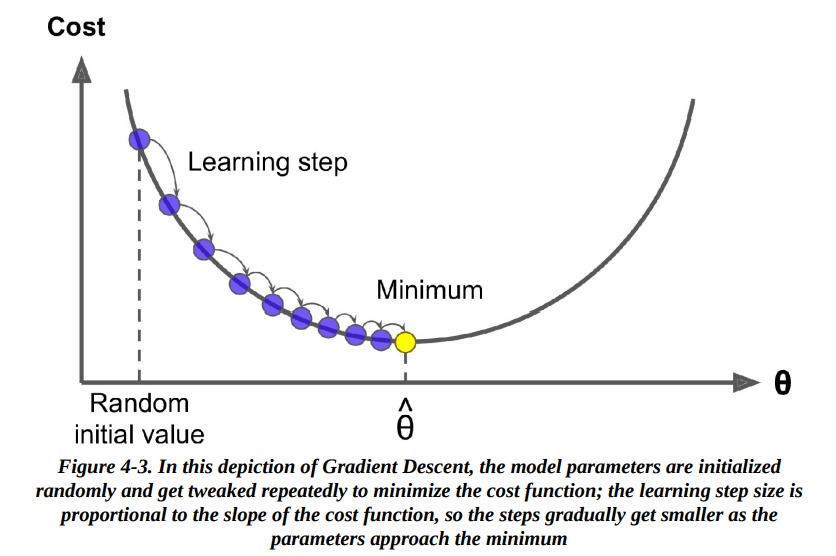

#### 最大目標: 你在山裡找最低點（山谷）

想像你蒙著眼睛在一座山上，目標是：

> **一步步走向「山谷最底部」**


- 為什麼我們要找**最低點**？

  - 因為我們在做機器學習的時候，會定義一個叫做 **損失函數（Loss Function）** 的東西，它的數值代表`模型「錯誤有多大」`，因為最低點代表模型錯誤最小，也就是學習得最好的時候。


你可以想成這樣：

- 整個「損失函數」就像是一座地形圖（有高有低）
- 我們的目標就是走下山 → 找到「最低點」  
  這個最低點代表模型的「預測誤差最小化」，也就是學習完成。


#### 那什麼是「梯度」？

> 梯度就像是你用手感受到的「地面的傾斜方向」和「坡度大小」。

- 如果你發現地面往前傾斜 → 就朝前走  
- 傾斜越陡 → 你就走得越快（步子大）  
- 傾斜很平 → 你慢慢移動（步子小）


#### 那「梯度下降」是什麼？

> 就是**沿著地面最斜的下坡方向走，直到你走到山谷底部（最低點）**


#### 那「隨機梯度下降」又是什麼？

你原本可能看整座山的地形（整筆資料）才決定要怎麼走。  
現在你說：

> 「我只用我眼前的一小塊地來判斷方向，雖然有點不準，但走快一點、多走幾次也能找到低處。」

這樣的走法雖然有點搖晃、偶爾會繞遠路，但整體上還是能走向谷底。

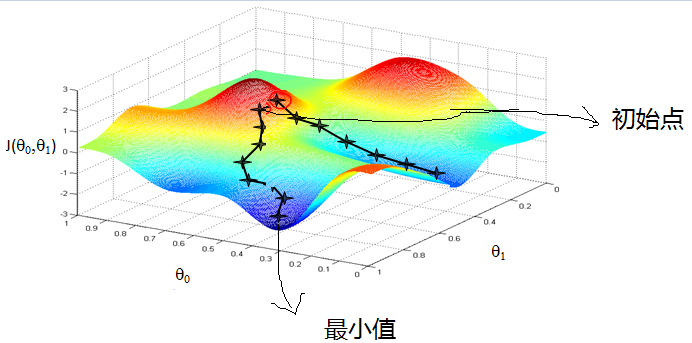

| 名詞             | 比喻                             |
|------------------|----------------------------------|
| 損失函數 (Loss)  | 山的高度                         |
| 參數 (weights)   | 你目前的位置                     |
| 梯度 (Gradient)  | 地面的傾斜方向與斜率             |
| 梯度下降         | 順著斜坡往下走                   |
| 最佳解 (Minimum) | 山谷最底部                       |
| SGD              | 只看局部地形就決定走法，走得快但不穩 |



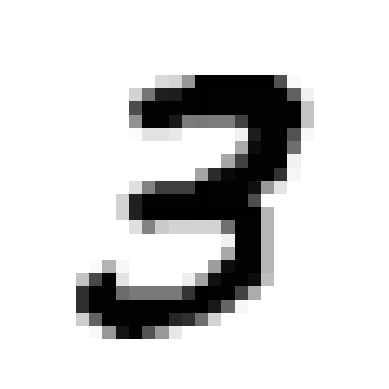

array([False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5) #訓練模型

#展示要預測的圖像
test_digit = x[7]
test_digit_image = test_digit.reshape(28, 28)

#展示圖像
plt.imshow(test_digit_image, cmap="binary")
plt.axis("off")
plt.show()

#預測第一筆圖像是否為5
sgd_clf.predict([some_digit]) #預測第一筆圖像是否為5

### 評量模型績效: 用交叉驗證評估準確度
#### 交叉驗證（Cross-validation）
交叉驗證是一種用來評估模型性能的技術，通過將數據集分成多個子集，然後多次訓練和測試模型來獲得更穩定的性能評估。這樣可以減少模型對特定數據集的過擬合風險。

常見的交叉驗證方法有 K-fold 交叉驗證和留一交叉驗證（Leave-One-Out Cross-Validation, LOOCV）。

>將資料「重複多次切分」，讓模型多次在不同的資料上訓練與測試，再平均表現來評估準確性。

In [31]:
#執行交叉驗證
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy") #cv=3表示三折交叉驗證


array([0.95035, 0.96035, 0.9604 ])


- `sgd_clf`：你建立的分類模型（應是使用隨機梯度下降的分類器）  
- `x_train`：訓練資料特徵  
- `y_train_5`：訓練資料標籤（可能是是否為數字 "5"）  
- `cv=3`：使用 3 折交叉驗證  
- `scoring="accuracy"`：以分類的**正確率**作為評估標準


```
array([0.95035, 0.96035, 0.9604])
```

表示模型在三次交叉驗證中得到的 **準確率**，所以如果將cv改成5，則會得到5個準確率的數值。


但我這邊準備一個很笨的分類器，他會將所有的數字都預測成5，這樣的準確率會是怎麼樣呢？



In [32]:
from sklearn.base import BaseEstimator  

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [33]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy") #預測準確率

array([0.91125, 0.90855, 0.90915])

我們從頭到尾猜測都是5，有90%的準確率，這是因為數字5的比例在資料集中是10%，所以我們隨便猜測都會有90%的準確率。
這樣的準確率是沒有意義的，因為我們並沒有學到任何東西，只是隨便猜測而已。

這代表甚麼?

>往往準確率對於模型來說不一定是最好的評估指標，尤其是當資料集有偏差(Skewed)的時候。

#### 混淆矩陣（Confusion Matrix）
混淆矩陣是一種用來評估分類模型性能的工具，它會顯示模型預測結果與實際標籤之間的關係。

混淆矩陣的每一行代表實際類別，每一列代表預測類別，看圖更直觀。

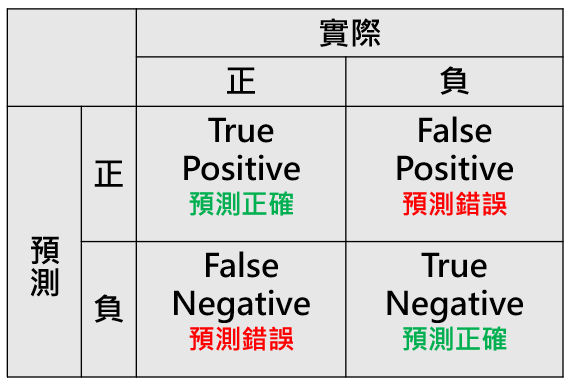

[參考資料](https://tako-analytics.com/2024-03-21-data-science-what-is-confusion-matrix-model-evaluation-metric/#google_vignette)


In [ ]:
#先進行預測
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3) #預測訓練集的標籤

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

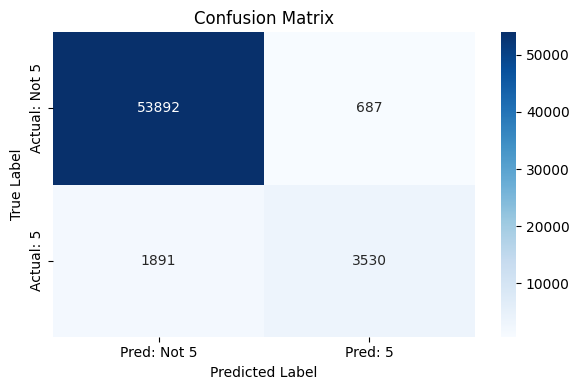

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
cm = confusion_matrix(y_train_5, y_train_pred)

# 繪製熱力圖
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: Not 5', 'Pred: 5'],
            yticklabels=['Actual: Not 5', 'Actual: 5'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


理論上，如果是最理想的結果，會是對角線的數字會是最大的，其他的數字會是很小的狀態。

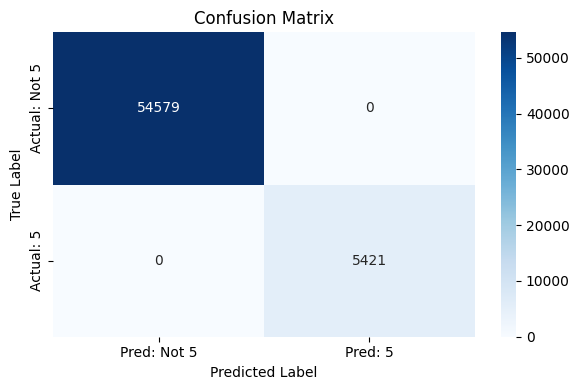

In [41]:
y_train_perfect_predictions = y_train_5 
cm_2 = confusion_matrix(y_train_5, y_train_perfect_predictions)

# 繪製熱力圖
plt.figure(figsize=(6, 4))
sns.heatmap(cm_2 , annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: Not 5', 'Pred: 5'],
            yticklabels=['Actual: Not 5', 'Actual: 5'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#### Precision（精確率） Recall（召回率）& F1 Score
如果想要更簡潔的評估指標，可以使用精確率（Precision）和召回率（Recall）。這兩個指標可以幫助我們更好地理解模型的性能，特別是在處理不平衡資料集時。

- **Precision（精確率）**：預測為正類的樣本中，實際為正類的比例。 `預測為正的有幾個是真的（少誤報）`
  - 公式：$$TP / (TP + FP)$$ 即真正例 / (真正例 + 假正例)。
- **Recall（召回率）**：實際為正類的樣本中，預測為正類的比例。 
  - 公式：$$TP / (TP + FN)$$ 即真正例 / (真正例 + 假負例)。 `真正為正的有幾個被抓出來（少漏報）`

TP：True Positive（真正例）
FP：False Positive（假正例）
TN：True Negative（真負例）
FN：False Negative（假負例）

還是很難理解? 看圖

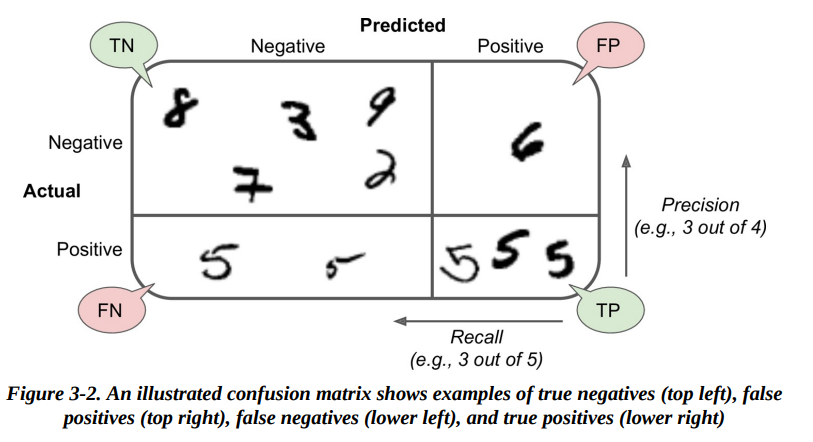

In [48]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 


0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

我們可以將這兩個指標結合起來，計算出 F1 Score，這是一個綜合考量精確率和召回率的指標。F1 Score 的值介於 0 和 1 之間，越接近 1 表示模型性能越好。
- $$ \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$



In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) #F1分數是精確率和召回率的調和平均數，綜合考量了兩者的表現

0.7325171197343846

當分類器的precision和recall都很高時，F1 Score也會很高。這意味著分類器在預測正類樣本時，既能準確地預測出正類樣本，又能捕捉到大部分的正類樣本。反之，如果precision和recall都很低，F1 Score也會很低。這意味著分類器在預測正類樣本時，既不能準確地預測出正類樣本，也不能捕捉到大部分的正類樣本。


#### precision/recall取捨
但有時候你在乎的是precision或recall的其中一個，而非兩者都要高

例如你要監控抓小偷，你可能會希望能夠抓到所有的小偷（召回率高），即使有些是誤報（精確率低）。
這時候你就可以調整你的模型，讓它的recall召回率高一點，雖然precision精確率會下降，但你能抓到更多的小偷。

這時我們會使用`決策函數` 來調整模型的預測閾值，如果分數大於某個值就預測為正類，否則預測為負類。這樣可以讓我們在精確率和召回率之間取得平衡。

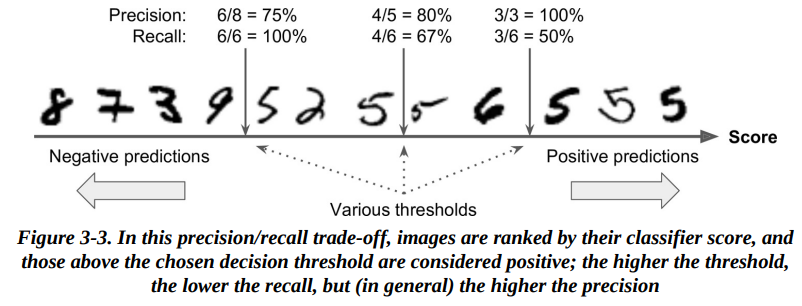

In [51]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores) 

[-5711.47789687]


In [55]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred) #預測結果為True，表示預測為5



[False]


那我們要如何決定閾值呢?

可以先使用cross_val_predict來獲得每個樣本的預測分數，然後使用precision_recall_curve來計算不同閾值下的精確率和召回率。最後，我們可以繪製出精確率和召回率的曲線圖，並選擇一個合適的閾值。


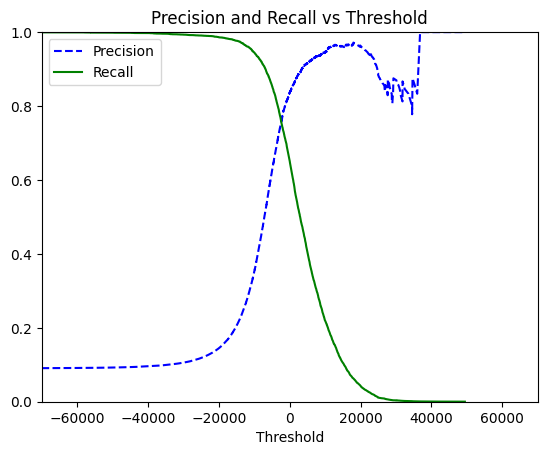

In [56]:
#可以先使用cross_val_predict來獲得每個樣本的預測分數，然後使用precision_recall_curve來計算不同閾值下的精確率和召回率。最後，我們可以繪製出精確率和召回率的曲線圖，並選擇一個合適的閾值。

y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,
y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.xlim([-70000, 70000])
    plt.title("Precision and Recall vs Threshold")
    plt.show()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) #繪製精確率和召回率的曲線圖



#### 討論: 為什麼 Precision 曲線不像 Recall 那麼平滑？

這是因為 **Precision 對極端樣本更敏感，尤其是在樣本數變化很小時**：


- Recall 的定義：

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

→ **分母是固定的（總共有多少真正的正樣本）**  
→ 當我們調整 threshold，只要預測中包含正樣本，Recall 就平滑地變化


- Precision 的定義：

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

→ 分母包含的是**所有預測為正的樣本數（不管真假）**  
→ 當 threshold 非常高時，只會挑出很少一部分樣本為正，這些樣本的 TP/FP 數量一點變動都會讓比例劇烈變動  
→ 尤其是當「正樣本很稀少」時（像 MNIST 中只有 10% 是數字 5），**Precision 就會很敏感、不平滑**


最後我們劃出Precision跟Recall的關係圖

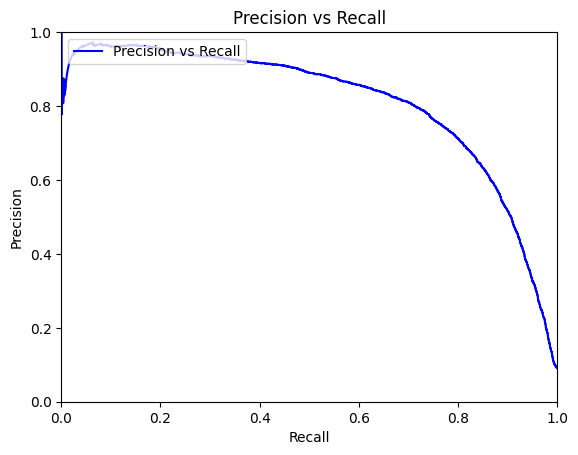

In [57]:
#劃出Precision跟Recall的關係圖
plt.plot(recalls, precisions, "b-", label="Precision vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.show() #繪製Precision跟Recall的關係圖

你可以根據這張圖來決定你要的閾值，找出 Precision 與 Recall 的折衷點，我們通常會選一個讓 F1 分數最高的位置作為預設 threshold，這樣可以讓模型在精確率和召回率之間取得平衡。

#### ROC（Receiver Operating Characteristic）曲線
這個指標會經常跟二元分類一起使用，因為它可以幫助我們評估模型在不同閾值下的性能。ROC 曲線是以假陽性率（False Positive Rate, FPR）為 x 軸，以真正率（True Positive Rate, TPR）為 y 軸繪製的曲線。

ROC 曲線呈現的是：  
> **當你降低決策門檻，預測更多為正時，你的召回率提升了多少、代價是假陽性上升了多少？**


**理想模型的 ROC 曲線**：接近左上角（高 TPR、低 FPR）  
**隨機模型 ROC 曲線**：在對角線（TPR ≈ FPR）  
**模型性能指標**：ROC 曲線下的面積（AUC）

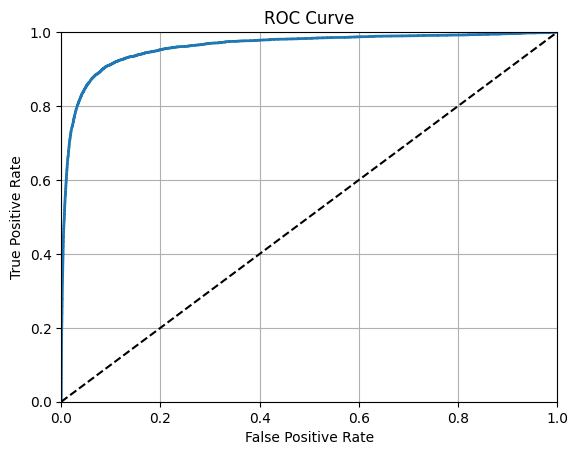

0.9604938554008616

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# 定義繪圖函數
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # 對角線
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

# 在函數外部呼叫它
plot_roc_curve(fpr, tpr)
plt.show()

#計算面積下面積(AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores) #計算AUC值，越接近1表示模型越好


我們建立第二個模型: 隨機森林分類器（Random Forest Classifier）來比較一下
但內容有點太多了，隨機森林的概念我會放到下周的內容裡再講解

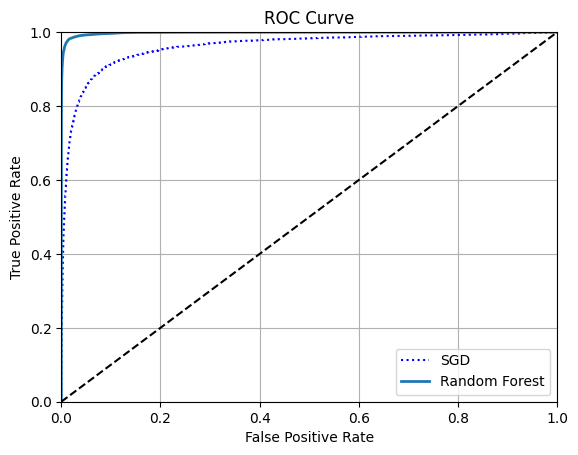

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


### 多元分類器(Multiclass Classifier)
多元分類器是指能夠處理多個類別的分類問題的模型。與二元分類器不同，多元分類器需要能夠同時預測多個類別的標籤。

這邊我們使用SVC（Support Vector Classifier）來建立一個多元分類器，這是一種基於支持向量機的分類模型。SVC 可以處理多類別問題，並且在許多情況下表現良好。


In [69]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores) #預測分數


[[ 2.73719174  6.20651629  3.81372559  9.32009109  0.69223349  6.26207869
  -0.31019599  1.69984884  8.29382546  6.23989726]]


我們使用`OneVsRestClassifier`來將 SVC 擴展到多類別問題。這個方法會將每個類別視為一個二元分類問題，然後訓練一個二元分類器來預測每個類別。最後，我們將所有的二元分類器結合起來，形成一個多元分類器。

In [70]:
# from sklearn.multiclass import OneVsRestClassifier
# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(x_train, y_train) # y_train, not y_train_5
# ovr_clf.predict([some_digit]) #預測第一筆圖像的標籤
# len(ovr_clf.estimators_) #顯示有多少個分類器


: 

: 


### 下周預告: 
會先針對決策樹、隨機森林、SVC這三個演算法做詳細的介紹，並且會針對這三個演算法做比較，讓大家了解他們的優缺點，以及在什麼情況下使用哪一個演算法會比較好。

### 下下周預告:
針對非監督式學習練習